      Sex   Value  Percentage
0    Male  469.24       55.09
1  Female  382.53       44.91


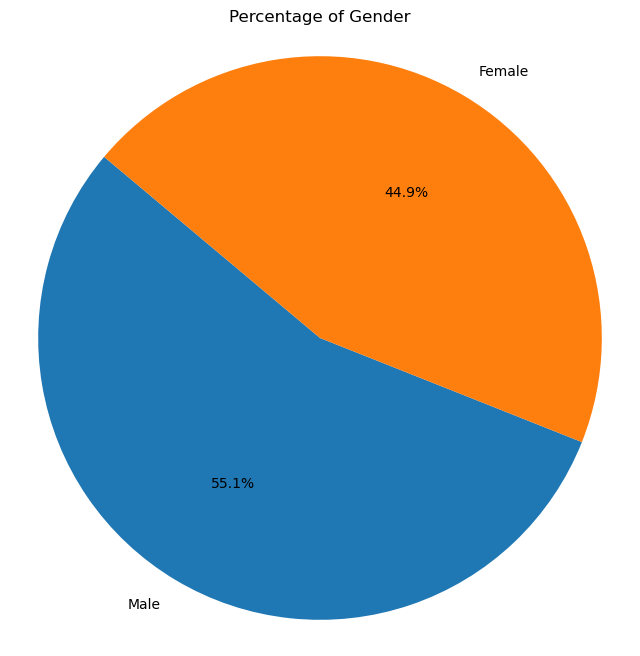

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Đường dẫn đến file CSV
file_path = 'TyLeTNtheoTuoi.csv'

# Đọc file CSV và lưu vào một DataFrame
df = pd.read_csv(file_path)
df = df.rename(columns={'ref_area.label': 'Country', 'sex.label': 'Sex', 'classif1.label': 'Age group', 'obs_value': 'Value'})
col = ['indicator.label', 'time', 'source.label', 'obs_status.label', 'note_classif.label', 'note_indicator.label', 'note_source.label','classif2.label' ]
df.drop(columns=col, inplace=True)
df = df[(df['Sex'] == 'Sex: Male') | (df['Sex'] == 'Sex: Female') ]
tong_theo_gioi_tinh_Male = df[df['Sex'] == 'Sex: Male']['Value'].sum()
tong_theo_gioi_tinh_FeMale = df[df['Sex'] == 'Sex: Female']['Value'].sum()
tong_theo_gioi_tinh_Male_formatted = round(tong_theo_gioi_tinh_Male, 2)
# Tạo từ điển chứa dữ liệu
data = {'Sex': ['Male', 'Female'], 'Value': [tong_theo_gioi_tinh_Male, tong_theo_gioi_tinh_FeMale]}

# Tạo DataFrame từ từ điển
df1 = pd.DataFrame(data)
df1.to_csv('TyLeTNtheoGioiTinh1.csv', encoding='utf-8', index=False, header=True)
# Tính toán phần trăm và thêm vào DataFrame
df1['Percentage'] = df1['Value'] / df1['Value'].sum() * 100  # Chỉnh sửa tên cột thành tên chính xác
df1['Percentage'] = df1['Percentage'].round(2)
print(df1)
df1.to_csv('TyLeTNtheoGioiTinh1.csv', encoding='utf-8', index=False, header=True)
# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(df1['Percentage'], labels=df1['Sex'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Gender')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()